In [1]:
from DataVisualisation import DataVisualisation
import ParametricalIdentification as pi
import pandas as pd
import numpy as np
import pandas as pd



In [2]:
import numpy as np

def numerical_derivative(func, x, h=1e-5):
    """
    Функция для вычисления производной с использованием метода конечных разностей.

    Parameters:
    func (callable): Функция, для которой нужно найти производную.
    x (float or np.ndarray): Точка(и), в которых вычисляется производная.
    h (float): Шаг для конечных разностей (по умолчанию 1e-5).

    Returns:
    derivative: Производная функции в точке(ах) x.
    """
    return (func(x + h) - func(x - h)) / (2 * h)



       date_x     USD_gold  year     date_y      USD_debt     exponent  \
0  1968-12-31    40.085849  1968 1968-06-30  3.475784e+11   154.730745   
1  1969-12-31    41.308981  1969 1969-06-30  3.537203e+11   158.527569   
2  1970-12-31    36.383030  1970 1970-06-30  3.709187e+11   162.581815   
3  1971-12-31    41.176601  1971 1971-06-30  3.981297e+11   166.910936   
4  1972-12-31    58.458462  1972 1972-06-30  4.272605e+11   171.533571   
5  1973-12-31    98.503680  1973 1973-06-30  4.581416e+11   176.469617   
6  1974-12-31   159.323074  1974 1974-06-30  4.750598e+11   181.740325   
7  1975-12-31   161.267635  1975 1975-06-30  5.331890e+11   187.368385   
8  1976-12-31   124.979959  1976 1976-06-30  6.204330e+11   193.378024   
9  1977-12-31   147.925714  1977 1977-09-30  6.988400e+11   199.795114   
10 1978-12-31   193.553871  1978 1978-09-30  7.715440e+11   206.647279   
11 1979-12-31   302.503462  1979 1979-09-30  8.265190e+11   213.964018   
12 1980-12-31   612.800763  1980 1980-

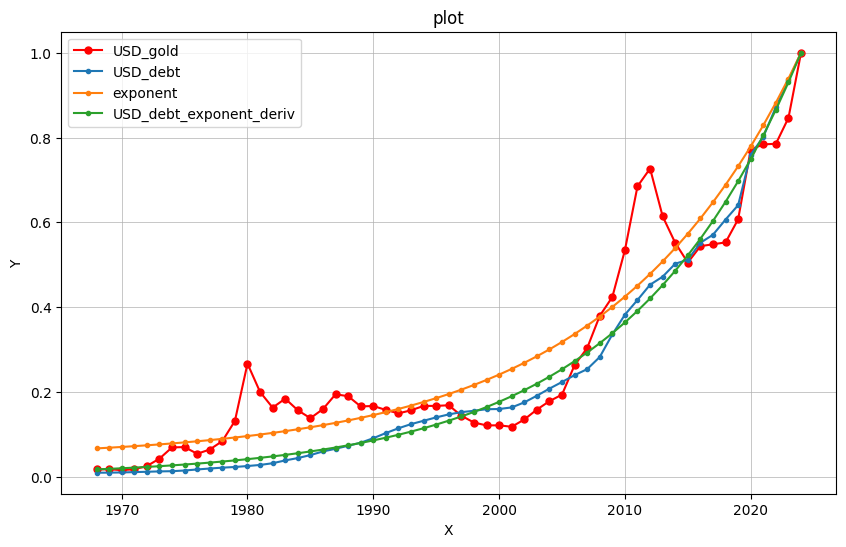

In [ ]:

debt = pd.read_csv("data/HstDebt_17900101_20240930.csv")
debt.columns = ["date","USD_debt"]
debt['date'] = pd.to_datetime(debt['date'])

dv = DataVisualisation()



df = pd.read_excel('data/Auronum-Historic-Gold-Price-Data-5.xlsx', usecols=[4,5])
df.columns = ["date","USD_gold"]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# Grouping data by year and calculating the average
yearly_avg = df.resample('YE').mean()
yearly_avg.reset_index(inplace=True)

# find exponent
y_year = np.array(yearly_avg['USD_gold'])
x_year = np.arange(1, len(y_year)+1)
a,b,c = [52.445,0.0656,98.73] 
exponent_y_year = pi.exponential_func(x_year,a,b,c)

debt['year'] = debt['date'].dt.year
yearly_avg['year'] = yearly_avg['date'].dt.year


merged_df = pd.merge(yearly_avg, debt, on='year')
merged_df['exponent'] = exponent_y_year

a,b,c = [580555710298.038, 0.07217163817885788, -271597937404.2504] #pi.general_least_squares_fit(x_year, np.array(merged_df['USD_debt']), pi.exponential_func,  [580555710298.038, 0.07217163817885788, -271597937404.2504],'exponent', epsilon=1e-6, is_print=True, max_iter=9999)
USD_debt_exponent = pi.exponential_func(x_year,a,b,c)
USD_debt_exponent_deriv = numerical_derivative(lambda xx:pi.exponential_func(xx, a, b, c), x_year)
merged_df['USD_debt_exponent_deriv'] = USD_debt_exponent_deriv
merged_df['USD_debt_exponent'] = USD_debt_exponent
merged_df['USD_debt_exponent_deriv'] = merged_df['USD_debt_exponent_deriv'] / merged_df['USD_debt_exponent_deriv'].max()
merged_df['USD_debt_exponent'] = merged_df['USD_debt_exponent'] / merged_df['USD_debt_exponent'].max()

print(merged_df)
# Normalize
merged_df['USD_gold'] = merged_df['USD_gold'] / merged_df['USD_gold'].max()
merged_df['USD_debt'] = merged_df['USD_debt'] / merged_df['USD_debt'].max()
merged_df['exponent'] = merged_df['exponent'] / merged_df['exponent'].max()



debt_plot = dv.plot_dataframe(merged_df,'year', 'USD_gold',else_y_cols=['USD_debt','exponent','USD_debt_exponent_deriv','USD_debt_exponent'])
debt_plot.show()
